# HW 5

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import numpy.random as rnd
import pandas as pd


#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

## Problem 1

<ipython-input-4-e7bf09dd6c97>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

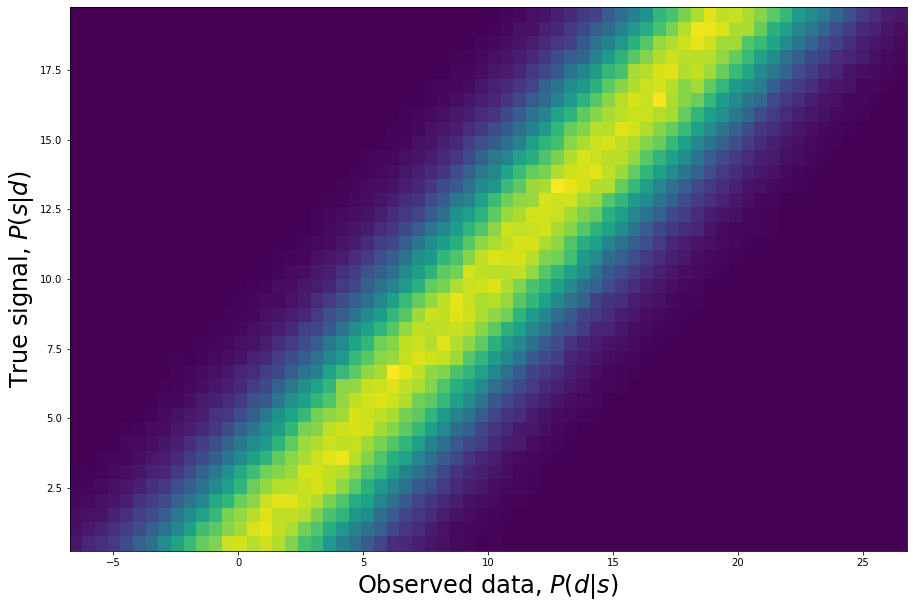

In [4]:
mu = 0
sigma=3
x = np.linspace(-7, 27, 1000000)
bkgd = stats.norm(mu, sigma).rvs(size=1000000)

#signal = np.zeros(1000000)
signal = np.random.uniform(0, 20, size=1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

#Psd: ndarray, shape(nx, ny)
#The bi-dimensional histogram of samples x and y. Values in x are histogrammed along the first dimension and values in y are histogrammed along the second dimension.
#temp, shape(nx+1,)
#The bin edges along the first dimension.
#temp2, shape(ny+1,)
#The bin edges along the second dimension.

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

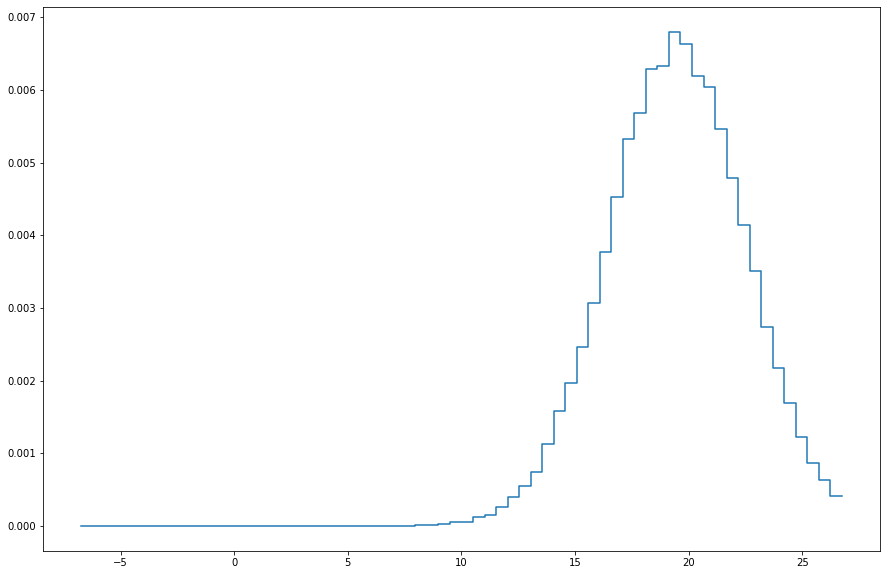

In [53]:
plt.step(datacenters, Psd.T[38]) #true signal slice

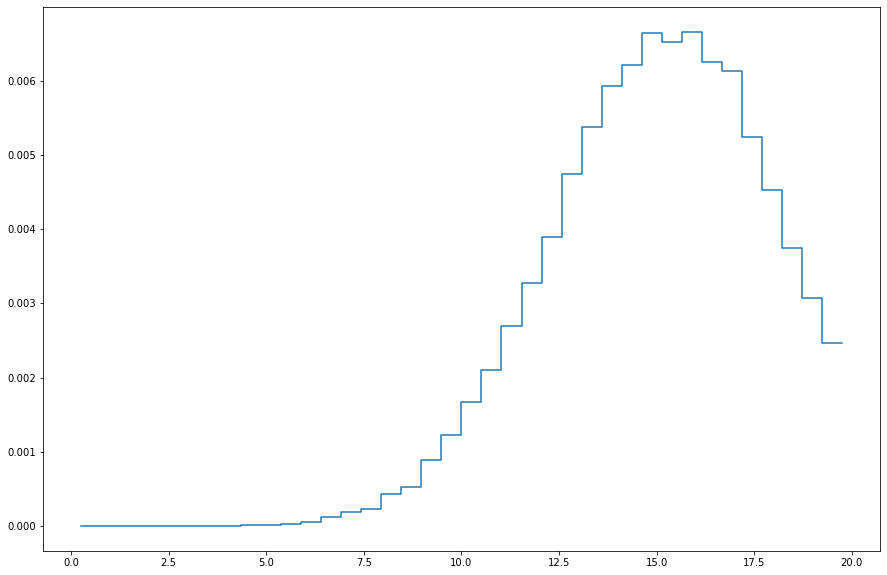

In [58]:
plt.step(signalcenters, Psd[44]) #obs data slice

In [38]:
datacenters

array([-6.74626866, -6.23880597, -5.73134328, -5.2238806 , -4.71641791,
       -4.20895522, -3.70149254, -3.19402985, -2.68656716, -2.17910448,
       -1.67164179, -1.1641791 , -0.65671642, -0.14925373,  0.35820896,
        0.86567164,  1.37313433,  1.88059701,  2.3880597 ,  2.89552239,
        3.40298507,  3.91044776,  4.41791045,  4.92537313,  5.43283582,
        5.94029851,  6.44776119,  6.95522388,  7.46268657,  7.97014925,
        8.47761194,  8.98507463,  9.49253731, 10.        , 10.50746269,
       11.01492537, 11.52238806, 12.02985075, 12.53731343, 13.04477612,
       13.55223881, 14.05970149, 14.56716418, 15.07462687, 15.58208955,
       16.08955224, 16.59701493, 17.10447761, 17.6119403 , 18.11940299,
       18.62686567, 19.13432836, 19.64179104, 20.14925373, 20.65671642,
       21.1641791 , 21.67164179, 22.17910448, 22.68656716, 23.19402985,
       23.70149254, 24.20895522, 24.71641791, 25.2238806 , 25.73134328,
       26.23880597, 26.74626866])

In [40]:
signalcenters

array([ 0.25641026,  0.76923077,  1.28205128,  1.79487179,  2.30769231,
        2.82051282,  3.33333333,  3.84615385,  4.35897436,  4.87179487,
        5.38461538,  5.8974359 ,  6.41025641,  6.92307692,  7.43589744,
        7.94871795,  8.46153846,  8.97435897,  9.48717949, 10.        ,
       10.51282051, 11.02564103, 11.53846154, 12.05128205, 12.56410256,
       13.07692308, 13.58974359, 14.1025641 , 14.61538462, 15.12820513,
       15.64102564, 16.15384615, 16.66666667, 17.17948718, 17.69230769,
       18.20512821, 18.71794872, 19.23076923, 19.74358974])

In [118]:
Psd.shape

(67, 39)

### Problem 1b
Select a true injected signal and plot  P(d|s) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]

In [161]:
def obs_slice(sgn):
    #fixed signal, displays observed data P(d|s)
    #dc = np.asarray(datacenters)
    idx = (np.abs(signalcenters - sgn)).argmin()
    flux = Psd.T[idx]
    
    plt.title(f'signal = {sgn}', fontsize=24)
    plt.xlabel(f'Observed data P(d|s)', fontsize=24)
    plot = plt.step(datacenters, flux)
    return plot

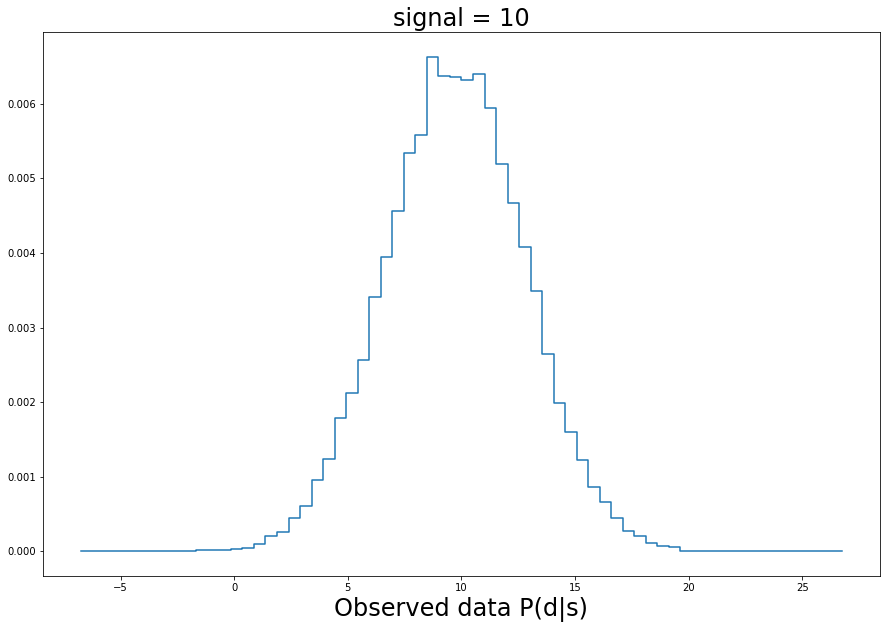

In [162]:
obs_slice(10) #signal = 10

This plot is the histogram that is seen when the injected signal is at 10. It is a horizontal slice of the 2D histogram, at y=10.

## Problem 1c
Select an observed data value and plot  P(s|d) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

In [163]:
def sgn_slice(data):
    #fixed signal, displays observed data P(d|s)
    idx = (np.abs(datacenters - data)).argmin() #finds index of nearest signal center
    flux = Psd[idx]
    
    plt.title(f'observed data = {data}', fontsize=24)
    plt.xlabel(f'True Signal P(s|d)', fontsize=24)
    plot = plt.step(signalcenters, flux)
    return plot

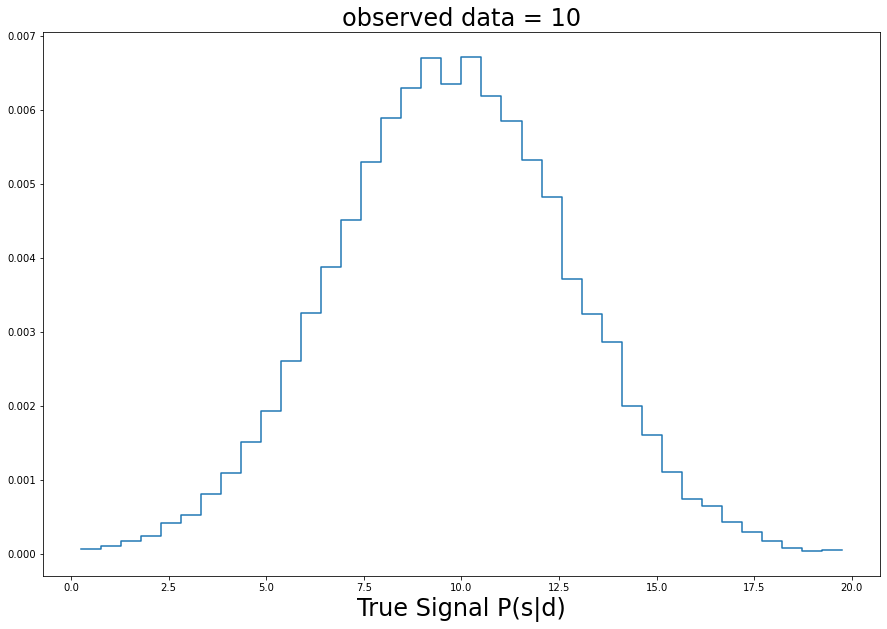

In [164]:
sgn_slice(10) #observed data = 10

This plot is the histogram that is seen when the observed is measured to be 10. It is a vertical slice of the 2D histogram, at x=10.

# Problem 2
Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  σ ]. Reproduce the graphs above. Lastly overplot the  P(d|s)  and  P(s|d)  plots. Why are they not centered on the same value? Explain carefully.

<ipython-input-155-d62025057c42>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters2,signalcenters2,Psd2.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

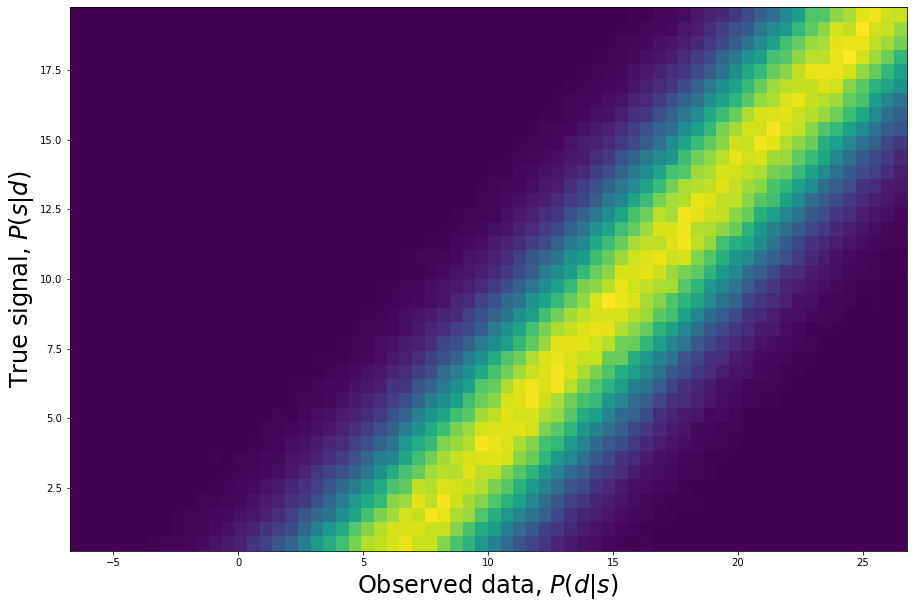

In [155]:
mu = 6 #2sigma
sigma=3
#x2 = np.linspace(-7, 27, 1000000)
bkgd2 = stats.norm(mu, sigma).rvs(size=1000000)

#signal = np.zeros(1000000)
signal2 = np.random.uniform(0, 20, size=1000000)

data2 = bkgd2 + signal2

signaledges2 = np.linspace(0,20,40)
dataedges2 = np.linspace(-7,27,68)

Psd2, temp_2, temp2_2= np.histogram2d(data2,signal2, bins=[dataedges2,signaledges2], density=True)

#Psd: ndarray, shape(nx, ny)
#The bi-dimensional histogram of samples x and y. Values in x are histogrammed along the first dimension and values in y are histogrammed along the second dimension.
#temp, shape(nx+1,)
#The bin edges along the first dimension.
#temp2, shape(ny+1,)
#The bin edges along the second dimension.

datacenters2 = (dataedges2[:-1] + dataedges2[1:]) / 2
signalcenters2 = (signaledges2[:-1] + signaledges2[1:]) / 2
plt.pcolormesh(datacenters2,signalcenters2,Psd2.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

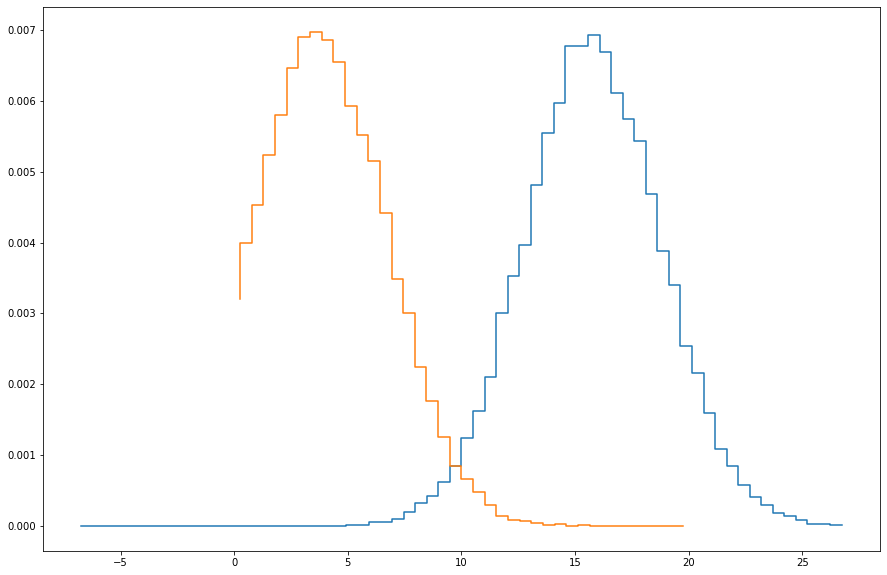

In [169]:
sgn=10
dat=10

idx_sgn = (np.abs(signalcenters2 - sgn)).argmin()
flux_sgn = Psd2.T[idx_sgn]
plt.step(datacenters2, flux_sgn)
idx_dat = (np.abs(datacenters2 - dat)).argmin() #finds index of nearest signal center
flux_dat = Psd2[idx_dat]
plt.step(signalcenters2, flux_dat)

These plots aren't centered on the same value because the mean is non-zero, and thus the peaks will not match, as when the signal is recorded to be 10, that will return a peak that is shifted to the right by the value of mu, and vice versa, when the observed data is recorded to be 10, the true signal will be shifted to the left by mu.